<a href="https://colab.research.google.com/github/binodmathews93/ML-Projects/blob/master/Applied_Machine_Learning_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('fire_archive_V1_96617.csv').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows[50])

# Convert to a DataFrame.
import pandas as pd
df = pd.DataFrame(rows)
df.columns = df.iloc[0]
df = df.iloc[1:]

['-30.85534', '150.71831', '327.2', '0.39', '0.59', '2019-08-01', '427', 'N', 'VIIRS', 'n', '1', '294.7', '4.4', '0']


In [3]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df[["latitude", "longitude"]] = df[["latitude", "longitude"]].apply(pd.to_numeric)

AttributeError: ignored

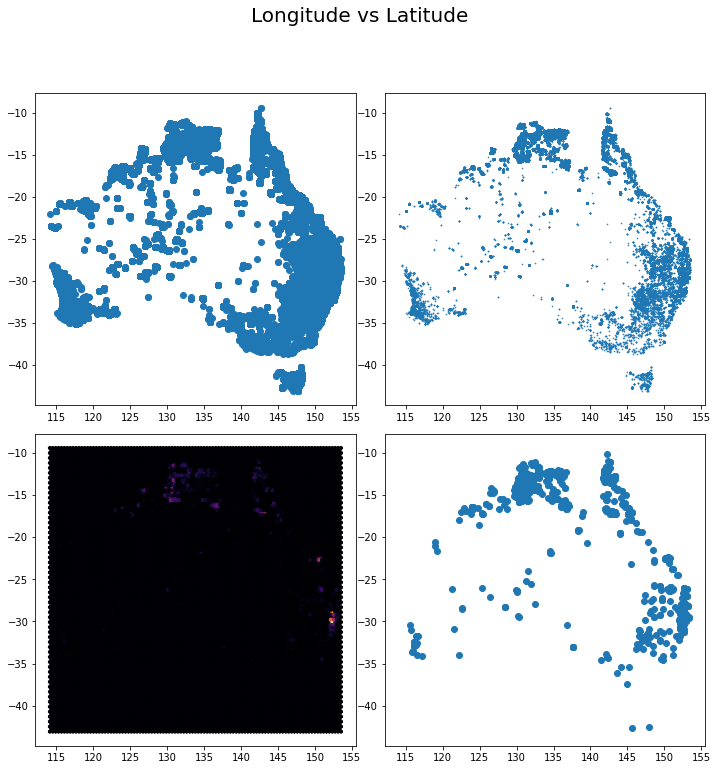

In [13]:
fig = plt.figure(figsize=(12, 12))
st = fig.suptitle("Longitude vs Latitude", fontsize=20)
#print(min(df['longitude'].astype('float')),min(df['latitude'].astype('float')))
#print(max(df['longitude'].astype('float')),max(df['latitude'].astype('float')))

sample_df = df.sample(frac=0.005)

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
p3 = fig.add_subplot(grid[2:,:2])
p1 = fig.add_subplot(grid[:2,:2], sharex=p3)
p4 = fig.add_subplot(grid[2:,2:], sharey=p3)
p2 = fig.add_subplot(grid[:2,2:], sharex=p4, sharey=p1)

p1.scatter(df['longitude'],df['latitude'])
p2.scatter(df['longitude'],df['latitude'],alpha = 0.8, s=0.5)
hb = p3.hexbin(df['longitude'],df['latitude'] ,cmap='inferno')
p4.scatter(sample_df['longitude'],sample_df['latitude'])

cb = fig.colorbar(hb,grid[2:,:2])
cb.set_label('log10(N)')

st.set_y(0.95)
fig.subplots_adjust(top=0.92)

fig.text(0.5, 0.04, 'Latitude', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Longitude', va='center', rotation='vertical', fontsize=20)

#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, (end-start)/5))
#start, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(start, end, (end-start)/5))



#plt.subplot(121)
#plt.scatter(df['longitude'][:10000],df['latitude'][:10000])

#plt.subplot(122)
#plt.scatter(df['longitude'][:10000],df['latitude'][:10000],alpha = 0.8, s=0.5)

#plt.show()